In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from future import GenericFuture
from curve import CommodityCurve


Bad key "text.kerning_factor" on line 4 in
/home/nashp/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
filename = "../data/TestData_Brent.xlsx"

In [5]:
data = pd.read_excel(filename, index_col="Date")
data.head()

,ICE_B1,ICE_B10,ICE_B11,ICE_B12,ICE_B13,ICE_B14,ICE_B15,ICE_B16,ICE_B17,ICE_B18,...,ICE_B33,ICE_B34,ICE_B35,ICE_B36,ICE_B4,ICE_B5,ICE_B6,ICE_B7,ICE_B8,ICE_B9
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,24.39,19.70,19.45,NaN,24.39,23.69,22.86,22.07,21.42,20.94,...,19.95,19.70,19.45,NaN,22.07,21.42,20.94,20.54,20.21,19.95
2000-01-05,23.73,19.46,19.21,NaN,23.73,23.22,22.50,21.80,21.17,20.69,...,19.71,19.46,19.21,NaN,21.80,21.17,20.69,20.30,19.97,19.71
2000-01-06,23.62,19.44,19.22,NaN,23.62,23.07,22.39,21.70,21.09,20.62,...,19.67,19.44,19.22,NaN,21.70,21.09,20.62,20.24,19.93,19.67
2000-01-07,23.09,19.42,19.18,NaN,23.09,22.65,22.20,21.55,20.97,20.52,...,19.66,19.42,19.18,NaN,21.55,20.97,20.52,20.17,19.88,19.66


In [6]:
tickers = data.columns
futures = [GenericFuture(ticker=t, number=int(t.split("_B")[1]), data=data[t]) for t in tickers]
brent_curve = CommodityCurve(num_instruments=len(futures))

for f in futures:
    brent_curve.add_future(f, f.contract_number())

brent_curve.create_curve()


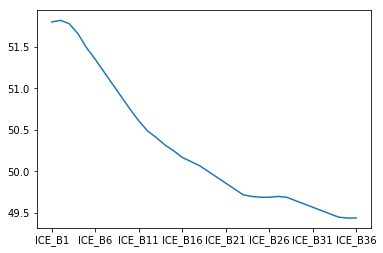

In [7]:
brent_curve.plot_latest()
plt.show()

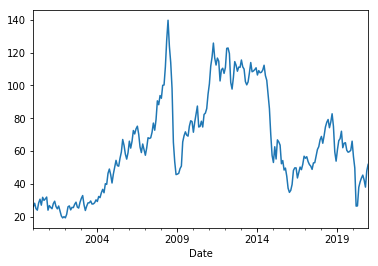

In [8]:
tickers = data.columns[1:]
fdata = data.iloc[:, 0]
ticker = tickers[1]
number = 1

future = GenericFuture(ticker=ticker, number=number)
future.fill_data(data=fdata)
future.to_monthly()
future.plot()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda15adc358>,
      dtype=object)

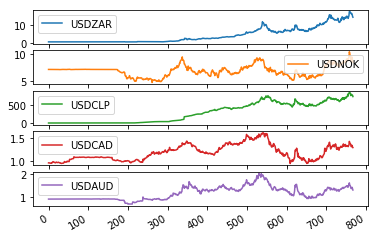

In [9]:
fx_filename = "../data/FXData.xlsx"
fxdata = pd.read_excel(fx_filename)
fxdata.head()
fxdata.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda161b70b8>,
      dtype=object)

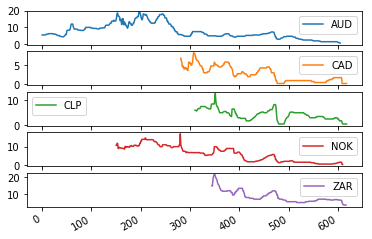

In [10]:
ir_filename = "../data/InterestRates.xlsx"
irdata = pd.read_excel(ir_filename)
irdata.head()
irdata.plot(subplots=True)